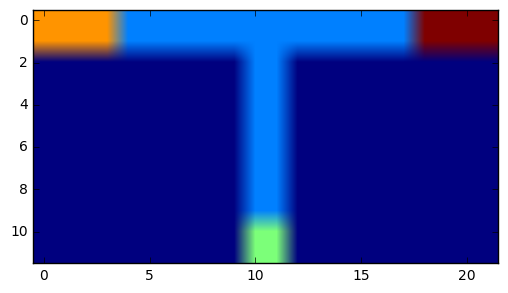

In [6]:
import numpy as np
import matplotlib.pyplot as plt

maze=np.zeros((12,22))
maze[:,10:12]=1
maze[0:2,:]=1
maze[10:12,10:12]="2"
maze[0:2,0:4]="3"
maze[0:2,18:22]="4"
plt.imshow(maze)
plt.show()

In [7]:
place_fields=np.ones(np.shape(maze))*-1


In [10]:
# need to make array with spatial positions of place fields 
place_fields=np.zeros(np.shape(maze))


def input_activity(s,sig=5):
    input_layer=np.zeros((2,12,22))
    x,y,alpha=s[0],s[1],s[2]
    if alpha==0:
        for i in range(12):
            for j in range(22):
                activity=(np.exp(-(((j*5)-x)**2+((i*5)-y)**2)/2*sig**2))
                input_layer[0,i,j]=activity
    elif alpha==1:
        for i in range(12):
            for j in range(22):
                activity=(np.exp(-(((j*5)-x)**2+((i*5)-y)**2)/2*sig**2))
                input_layer[1,i,j]=activity
    return input_layer
    

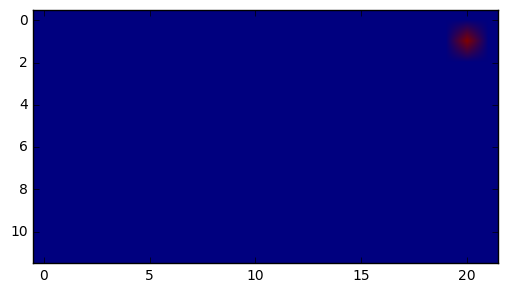

In [29]:
s=[100,5,1]
plt.imshow(input_activity(s)[1])
plt.show()

In [24]:
def output_activity(input_layer,weights):
    return input_layer*weights

In [23]:
class Environment():
    
    actions = {'up': 0, 'down': 1, 'left':2,'right':3}
    
    
    def __init__(self, maze):
        self.maze = maze
        self.reset()
        
    def reset(self):
        self.pos = np.random.randint(1, self.num_fields - 1)  # do not start on the doener fields
        return self.pos
    
    def step(self, action):
        if action == self.actions['up']:
            self.pos += 1
        elif action == self.actions['down']:
            self.pos -= 1
        else:
            raise ValueError('Received invalid action:', action)
            
        if self.pos == 0:
            reward = 1000
            done = True
        elif self.pos == self.num_fields - 1:
            reward = 100
            done = True
        else:
            reward = -10
            done = False
            
        return self.pos, reward, done